In [1]:
using Images, ImageFeatures, FileIO, ImageView, ImageDraw, Colors
# using ImageProjectiveGeometry

img1 = load("../test/imgs/1.jpg");
img2 = load("../test/imgs/2.jpg");
img1p = parent(img1);
img2p = parent(img2);

In [45]:
function get_descriptors(img::AbstractArray)
    imgp = parent(img)
    brisk_params = ImageFeatures.BRISK()
    features = ImageFeatures.Features(Keypoints(imcorner(imgp, method=ImageFeatures.harris)))
    desc, ret_features = ImageFeatures.create_descriptor(Gray.(imgp), features, brisk_params)
end

get_descriptors (generic function with 1 method)

In [41]:
# descriptors
desc_1, ret_features_1 = get_descriptors(img1p);
desc_2, ret_features_2 = get_descriptors(img2p);

In [47]:
# matches
threshold = 0.1;
matches = ImageFeatures.match_keypoints(Keypoints(ret_features_1), Keypoints(ret_features_2), desc_1, desc_2, threshold);

Array{Array{CartesianIndex{2},1},1}

In [52]:
typeof(matches)
# axes(img1p)

(Base.OneTo(720), Base.OneTo(1280))

In [51]:
H = ImageProjectiveGeometry.homography2d(img1p, img2p)

MethodError: MethodError: no method matching homography2d(::Array{RGB{Normed{UInt8,8}},2}, ::Array{RGB{Normed{UInt8,8}},2})

In [49]:
H = ImageProjectiveGeometry.homography2d(matches)

MethodError: MethodError: no method matching homography2d(::Array{Array{CartesianIndex{2},1},1})
Closest candidates are:
  homography2d(!Matched::Array{T<:Real,2}) where T<:Real at C:\Users\m1\.julia\packages\ImageProjectiveGeometry\LXkqM\src\projective.jl:981
  homography2d(!Matched::Array{T1<:Real,2}, !Matched::Array{T2<:Real,2}) where {T1<:Real, T2<:Real} at C:\Users\m1\.julia\packages\ImageProjectiveGeometry\LXkqM\src\projective.jl:937

In [294]:
using Images, ImageFeatures, FileIO, ImageView
using CoordinateTransformations, StaticArrays, ImageTransformations, LinearAlgebra;

img1 = load("../test/all_3/1.jpg");
img2 = load("../test/all_3/2.jpg");
# img3 = load("../test/all_3/3.jpg");

In [ ]:
2×2 RotMatrix{2,Float64,4}:
  0.999507   0.0314108
 -0.0314108  0.999507 

3×3 RotMatrix{3,Float64,9}:
  0.999788   0.003629  -0.020254
 23.2449    -0.003697   0.999988
 -0.003359  -0.077094   0.020242

LinearMap([0.999507 0.0314108; -0.0314108 0.999507])
LinearMap([0.999788 0.003629; -0.003359 0.999788])
LinearMap([0.999788 0.003629 -0.020254; 23.2449 -0.003697 0.999988; -0.003359 -0.077094 0.020242])

In [ ]:

# rot_1 = [0.999788  0.003629  -0.020254;  23.244938  -0.003697  0.999988 ; -0.003359  -0.077094  0.020242]
rot_1 = [0.999788  0.020254 ; -0.020254 0.999788]
tran = [0.003433  0.999789  0.316536]
rot = RotMatrix{2, Float64}(rot_1)

In [13]:
using Rotations, StaticArrays
rot_1 = [0.999788  0.003629  -0.020254;  23.244938  -0.003697  0.999988 ; -0.003359  -0.077094  0.020242]
# rot_1 = [0.999788  0.003629  -0.020254;  23.244938  -0.003697  0.999988 ; -0.003359  -0.077094  0.020242]'

# [[-1.16185012], [-1.06024884], [1.1998094]]

rot_1 = RotMatrix{3, Float64}(rot_1)
# ϕv = AngleAxis(rot_1')  # 2.9687, -0.0462937, -0.000726159, 0.998928   
spq = SPQuat(rot_1)  # -0.0424553, -0.000665949, 0.916101
# a = Quat(rot_1)  # 0.0863398, -0.0461209, -0.000723447, 0.995197
# rv = RodriguesVec(rot_1)  # -0.137432, -0.00215575, 2.96551   **********  向量和矩阵 转换. 
# 对应到 rvecs_matrix = cv2.Rodrigues(rvecs, None)   但是算的结果不一样. 什么回事??
# ϕ = rotation_angle(rot_1)  # 2.968697848578311
# v = rotation_axis(rot_1)  # -0.046293732605904026 -0.0007261588369100483 0.9989276064934618  

3×3 Quat{Float64}(0.0863398, -0.0461209, -0.000723447, 0.995197):
 -0.980837   -0.171783    -0.0919236 
  0.171917   -0.98509      0.00652418
 -0.0916738  -0.00940407   0.995745  

In [4]:
?RodriguesVec

search: RodriguesVec



```
struct RodriguesVec{T} <: Rotation{3,T}
RodriguesVec(sx, sy, sz)
```

Rodrigues vector parameterization of a 3×3 rotation matrix. The direction of the vector [sx, sy, sz] defines the axis of rotation, and the rotation angle is given by its norm.


In [301]:
# 0.999913  0.001119  0.013171  24.151129  -0.001307  0.999897  0.014312  0.111203  -0.013154 
rot_2 = [0.999913  -0.013171 ; 0.013171 0.999913]
tran = [0.003433  0.999789  0.316536]
rot_2 = RotMatrix{2, Float64}(rot_2)

H_2 = LinearMap(rot_2)
T_2 = Translation(tran)
# img2_1 = ImageTransformations.warp(img2, H_2)
img2_1 = ImageTransformations.warp(img2, T_2)
# img2_2 = T_2(img2)
# img2 = img2_1[1:end-500, 1:2592]

DimensionMismatch: DimensionMismatch("Sizes (Size(2,), (1, 3)) of input arrays do not match")

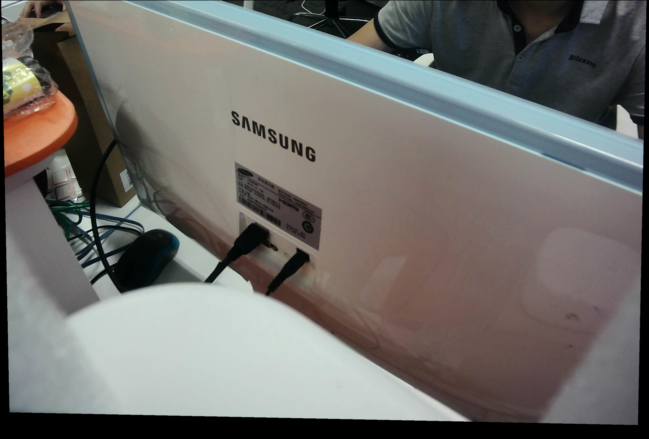

In [337]:

rot_1 = [0.999788  0.020254 ; -0.020254 0.999788]
tran = [0.003433  0.999789  0.316536]
rot_1 = RotMatrix{2, Float64}(rot_1)

H_1 = LinearMap(rot_1)
T_1 = Translation(tran')
img1_1 = ImageTransformations.warp(img1, H_1)

img1 = img1_1[100:end, 1:2592]

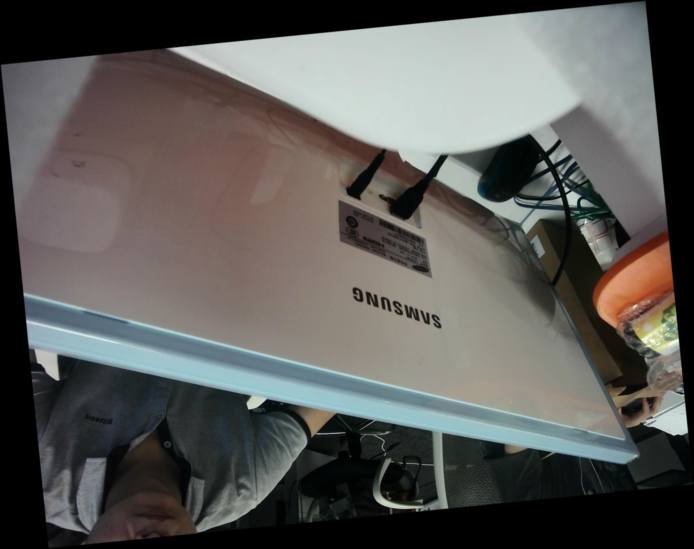

In [334]:
img1 = load("../test/all_3/1.jpg");
rot_1 = RotMatrix(pi*2.9686)
H_1 = LinearMap(rot_1)
img1_1 = ImageTransformations.warp(img1, H_1)

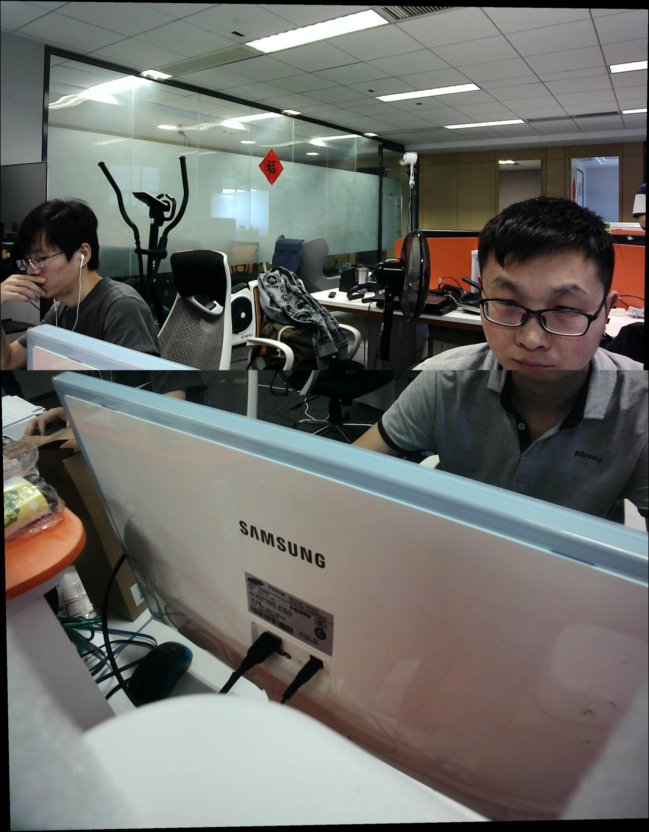

In [290]:
img = vcat(img2, img1)

In [265]:
?imrotate

search: imrotate



```
imrotate(img, θ, [indices], [degree = Linear()], [fill = NaN]) -> imgr
```

Rotate image `img` by `θ`∈[0,2π) in a clockwise direction around its center point. To rotate the image counterclockwise, specify a negative value for angle.

By default, rotated image `imgr` will not be cropped. Bilinear interpolation will be used and values outside the image are filled with `NaN` if possible, otherwise with `0`.

# Examples

```julia
julia> img = testimage("cameraman")

# rotate with bilinear interpolation but without cropping 
julia> imrotate(img, π/4)

# rotate with bilinear interpolation and with cropping
julia> imrotate(img, π/4, axes(img))

# rotate with nearest interpolation but without cropping
julia> imrotate(img, π/4, Constant())
```

See also [`warp`](@ref).
